# Praktična programska pitanja vezana uz skupove podataka

## 1. Zadatak
Skup podataka „Estonia“ sadrži **zemlju podrijetla**, **ime**, **spol** (M - muški, F - ženski), **godine**, **kategoriju** (P - putnik, C - posada) i **sudbinu** (0 - poginuo, 1 - preživio) za 742 putnika na brodu MS Estonia u noći potonuća. Za ovaj skup podataka (`estonia-passenger-list-modified.csv`) odredite:

a) (1 bod) Kako biste klasificirali zadani izvor podataka prema strukturi?

In [1]:
import pandas as pd

from pathlib import Path

In [2]:
dataset_dir = Path("./datasets/")

df = pd.read_csv(dataset_dir / "estonia-passenger-list-modified.csv")
df.head()

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived
0,694,Estonia,MARGUS,PUKSPUU,M,35.0,P,0
1,596,Sweden,BRITT MARGARETA,NILSSON,F,39.0,P,0
2,550,Estonia,IVI,MATSALU,F,58.0,P,0
3,291,Sweden,BIRGIT MARIA,JAKOBSSON,F,67.0,P,0
4,388,Estonia,SAIDYA,KIVILA,F,48.0,C,0


**Odgovor:** 3 su podjele podataka obzirom na izvor podataka, **struktuirani, polustrukturirani i nestrukturirani** podatci. Naš slučaj pripada klasi strukturiranih podataka, jer se koriste neke oznake kojima se opisuju strukture i značenja podataka.

b) (1 bod) Objasnite o kojoj se vrsti istraživanja prema vrsti korištenih podataka
ovdje radi.

**Odgovor:** Dvije su podjele, **kvalitativno i kvantitativno** istraživanje. Ovdje se radi o kvalitativnoj vrsti istraživanja.

c) (1 bod) Objasnite radi li se ovdje o **studiji presjeka** ili o **longitudinalnom
istraživanju**.

**Odgovor:** Način podjele istraživanja prema vremenu provedbe. U našem se slučaju govori o studiji presjeka (govori se o točno određenom trenutku, potonoću broda, a ne o dužem vremenskom periodu).

d) (2 boda) Kako je u ovo istraživanje uključen slučajan podskup od 742 putnika (od
ukupnog broja od 989 putnika), radi li se o slučajnom, pristranom ili neslučajnom
uzorku? Objasnite svoj odgovor. Definirajte svaki od navedenih vrsta uzoraka.

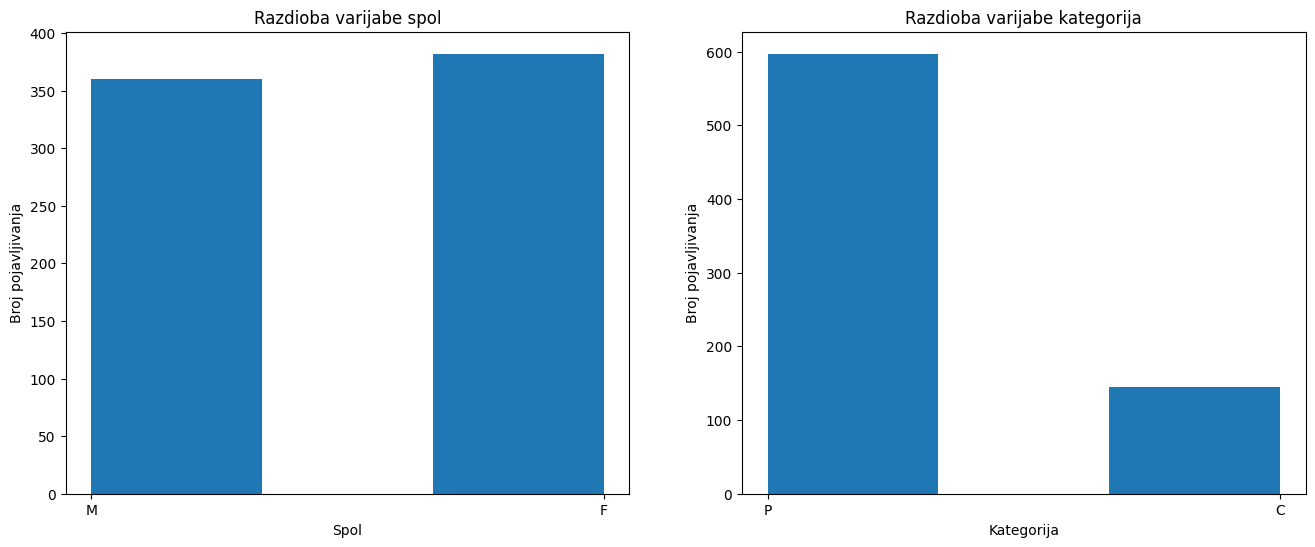

In [3]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

axs[0].hist(df['Sex'], bins=3)
axs[0].set_title('Razdioba varijabe spol')
axs[0].set_xlabel('Spol')
axs[0].set_ylabel('Broj pojavljivanja')

axs[1].hist(df['Category'], bins=3)
axs[1].set_title('Razdioba varijabe kategorija')
axs[1].set_xlabel('Kategorija')
axs[1].set_ylabel('Broj pojavljivanja')

plt.show()

**Odgovor:** Slučajni uzorak ima (teoretski) normalnu razdiobu, pristrani govori da postoji veća šansa da određeni uzorak bude izabran, te neslučajni uzorak označava situaciju gdje nije postojala jednaka vjerojatnost da svi članovi populacije budu odabrani. Iako se sa slike vidi značajna pristranost putnika u odnosu na osoblje, očekivano je da odnos bude takav (ne možemo očekivati podjednaku razdiobu putnika i posade broda). Zaključak, radi se o slučajnome uzorku.

e) (2 boda) Izbacite značajke `PassengerId`, `Firstname` i `Lastname`. Za svaku od značajki `Country`, `Sex` i `Category` iskoristite odgovarajuću metodu pretvorbe (engl. *encoder*) kako biste kategoričke podatke transformirali u numeričke vrijednosti.

In [4]:
cleaned_df = df.drop(['PassengerId', 'Firstname', 'Lastname'], axis=1)
cleaned_df.head()

,Country,Sex,Age,Category,Survived
0,Estonia,M,35.0,P,0
1,Sweden,F,39.0,P,0
2,Estonia,F,58.0,P,0
3,Sweden,F,67.0,P,0
4,Estonia,F,48.0,C,0


In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()  # We use label encoding especially on Country variable due to many different options
le.fit(cleaned_df.loc[:, 'Sex'])
cleaned_df.loc[:, 'Sex'] = le.transform(cleaned_df.loc[:, 'Sex'])

le.fit(cleaned_df.loc[:, 'Category'])
cleaned_df.loc[:, 'Category'] = le.transform(cleaned_df.loc[:, 'Category'])

le.fit(cleaned_df.loc[:, 'Country'])
cleaned_df.loc[:, 'Country'] = le.transform(cleaned_df.loc[:, 'Country'])

cleaned_df.head()

,Country,Sex,Age,Category,Survived
0,3,1,35.0,1,0
1,13,0,39.0,1,0
2,3,0,58.0,1,0
3,13,0,67.0,1,0
4,3,0,48.0,0,0


f) (2 boda) Provedite zamjenu nedostajućih vrijednosti značajke `Age` mjerom očuvanja sredine. Pojasnite koju mjeru sredine koristite i zašto.

Broj nedostajućih vrijednosti značajke Age: 37


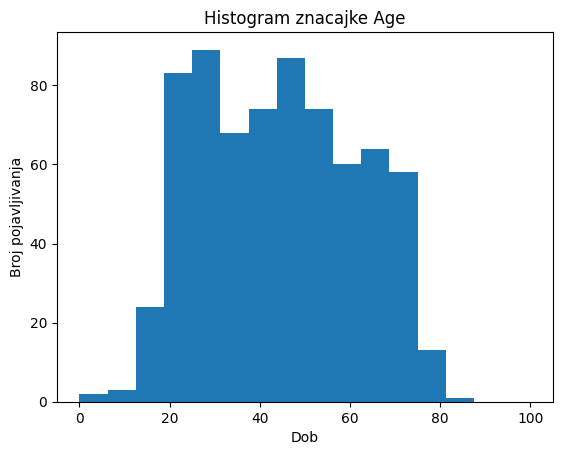

Broj nedostajućih vrijednosti značajke Age: 0


In [6]:
print(f"Broj nedostajućih vrijednosti značajke Age: {cleaned_df['Age'].isna().sum()}")

plt.hist(cleaned_df['Age'], bins='auto', range=(0, 100))
plt.xlabel('Dob')
plt.ylabel('Broj pojavljivanja')
plt.title('Histogram znacajke Age')
plt.show()

cleaned_df['Age'] = cleaned_df['Age'].fillna(cleaned_df['Age'].mean())

print(f"Broj nedostajućih vrijednosti značajke Age: {cleaned_df['Age'].isna().sum()}")

**Odgovor:** S obzirom na to da se iz grafičkog prikaza vidi "normalna" razdioba bez većih stršećih vrijednosti (nije potrebno koristit robusnije mjere kao medijan), možemo koristiti nadopunjavanje aritmetičkom sredinom.

g) (2 boda) Provjerite prikladnim prikazom je li distribucija značajke “Age”
simetrična. Ako nije, objasnite o kojoj se vrsti asimetričnosti radi.

**Odgovor:** U prethodnoj smo ćeliji za potrebe određivanja metode nadopune vrijednosti grafički prikazali razdiobu varijable Age. Iako je blago veća pristranost prema godinama manjima od 50, razdioba je i dalje simetrična.

h) (4 boda) Provedite postupak *DBSCAN* kako biste otkrili stršeće vrijednosti u ovom skupu podataka ne uzimajući u obzir ciljnu značajku `Survived`. Po potrebi varirajte parametre algoritma te na temelju odgovora algoritma provjerite naznačene pojedince. Navedite redne brojeve stršećih podataka.

In [7]:
import numpy as np

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=3, min_samples=4)
dbscan.fit(cleaned_df.iloc[:, :-1])

labels = dbscan.labels_
outliers = np.where(labels == -1)[0]

print("Nađene stršeće vrijednosti na rednim brojevima:", *outliers)

Nađene stršeće vrijednosti na rednim brojevima: 11 30 98 315 325 328 483 512 513 530 620 638 659


i) (3 boda) Provjerite mogu li se stršeće vrijednosti otkriti koristeći samo metode vizualizacije podataka. Pritom primijenite prikladni graf za njihovo otkrivanje. Koji graf koji ste isprobali daje najbolji prikaz stršećih vrijednosti?

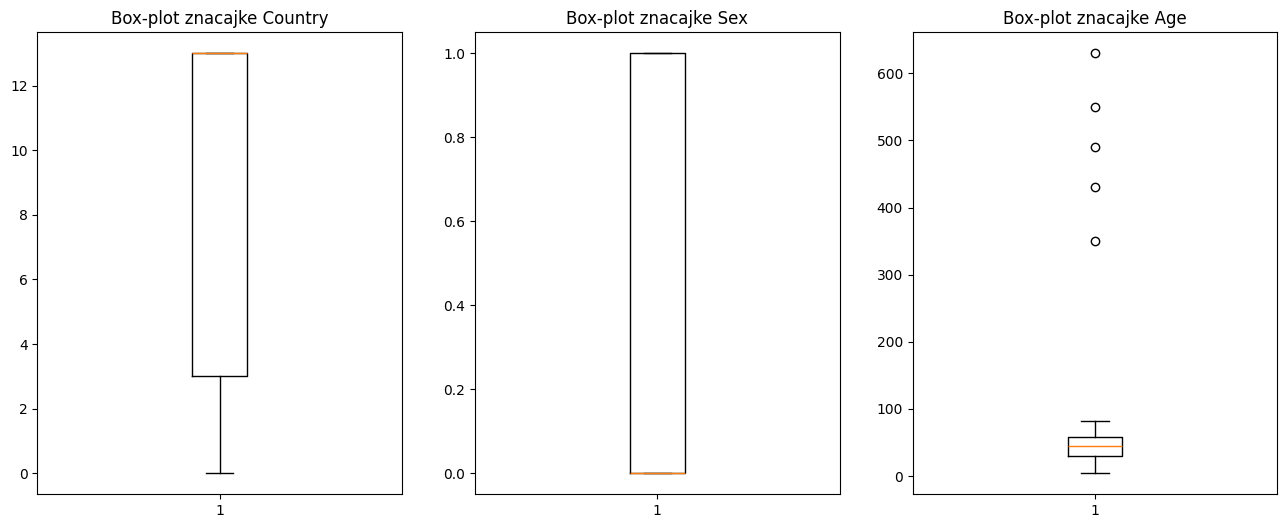

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(16, 6))

for i, col_name in enumerate(cleaned_df.columns[:-2]):  # We do not need category and survived
    axs[i].boxplot(cleaned_df[col_name])
    axs[i].set_title(f'Box-plot znacajke {col_name}')

plt.show()

**Odgovor:** Iako se iz stupčastog grafa može vidjeti broj stršećih vrijednosti, najbolje se vidi korištenjem engl. *box-plot* dijagrama. Pogledamo li značajku `Age` vidimo značajno odstupanje nakon trećeg kvartila.

j) (4 boda) Korištenjem prikladnog algoritma nadziranog strojnog učenja s jasnim
tumačenjem ustanovite koja zemlja je bila najsretnija pri preživljavanju. Navedite
o kojoj zemlji se radi i gdje u modelu se ta činjenica vidi. Pritom model učite na
slučajno izdvojenih 67% podataka, a testirajte na preostalom skupu.

Točnost modela:  0.8163265306122449
Izvještaj o klasifikaciji:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89       211
           1       0.31      0.26      0.29        34

    accuracy                           0.82       245
   macro avg       0.60      0.58      0.59       245
weighted avg       0.80      0.82      0.81       245



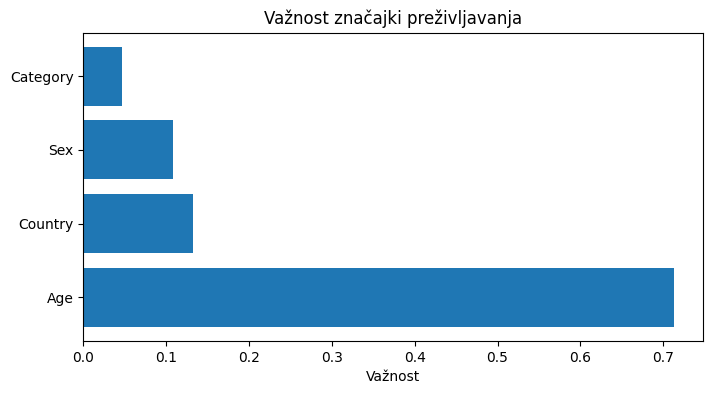

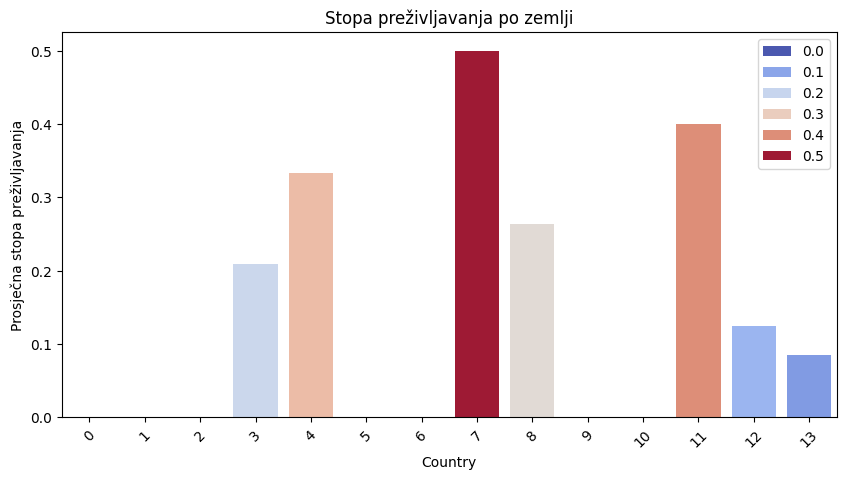

Zemlja s najvećom šansom preživljavanja: 7


In [9]:
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

X = cleaned_df[['Country', 'Sex', 'Age', 'Category']]
y = cleaned_df['Survived']

scaler = StandardScaler()
X.loc[:, 'Age'] = scaler.fit_transform(X[['Age']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

model = RandomForestClassifier(n_estimators=150, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Točnost modela: ", accuracy_score(y_test, y_pred))
print("Izvještaj o klasifikaciji:\n", classification_report(y_test, y_pred))

country_survival = cleaned_df.groupby("Country")["Survived"].mean().sort_values(ascending=False)
feature_importances = pd.DataFrame({'Feature': X.columns,
                                    'Importance': model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 4))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Važnost')
plt.title('Važnost značajki preživljavanja')
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x=country_survival.index, y=country_survival.values, palette='coolwarm', hue=country_survival.values)
plt.xticks(rotation=45)  # Rotate labels so they dont look like ordinary numbers
plt.title("Stopa preživljavanja po zemlji")
plt.ylabel("Prosječna stopa preživljavanja")
plt.show()

luckiest_id = country_survival.idxmax()
print(f"Zemlja s najvećom šansom preživljavanja: {luckiest_id}")  # 7 is Great Britain

**Odgovor:** Možemo koristiti slučajne šume ili logističku regresiju zbog probabilističke interpretabilnosti. Iz grafičkog se prikaza vidi da je zemlja s brojem 7 najsretnija sto se preživljavanja tiče.

## 2. Zadatak

Skup podataka „Possum“ sadrži podatke o 104 planinska četkasta oposuma pronađena na sedam lokacija u Australiji: **redni broj oposuma**, **oznaku lokacije** gdje je pronađen oposum, **populaciju** (Vic – Victoria, other – Novi Južni Wales ili Queensland), **spol** (M - muški, F – ženski), **dob**, **duljina glave** u mm, **širina lubanje** u mm, **ukupna duljina** u cm, **duljina repa** u cm, **duljina stopala** u mm, **duljina ušne školjke** u mm, **udaljenost od medijalnog kantusa do lateralnog kantusa desnog oka** u mm, **obujam prsa** u cm i **opseg trbuha** u cm. Za ovaj skup podataka (`possum.csv`) odredite:

a) (3 boda) Navedite metode prikupljanja podataka. Koja od navedenih metoda je
mogla biti upotrijebljena prilikom stvaranja ovog skupa podataka? Objasnite.

**Odgovor:** Metode prikupljanja podataka su: **dokumentirano istraživanje**, **intervju**, **fokusna skupina**, **studija slučaja**, **etnografska studija**, **opservacijsko istraživanje**, **eksperiment** i **upitnik**. Prilikom stvaranja ovog skupa podataka, moguće je da se koristilo dokumentirano istraživanje jer govorimo o određenoj statistici ustanovljenoj na različitim lokacijama u Australiji.

b) (3 boda) Kako možemo ukloniti statistički redundantne (nebitne) značajke?
Primjenom odgovarajuće metode utvrdite postoje li takve numeričke značajke u
ovom skupu i uklonite ih.

In [10]:
df = pd.read_csv(dataset_dir / "possum.csv")
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [11]:
monotonic_features = []

for feature in df.columns:
    if df[feature].is_monotonic_increasing:
        print(f"Monotono rastuća značajka: {feature}")
        monotonic_features.append(feature)

cleaned_df = df.drop(monotonic_features, axis=1)
cleaned_df.head()

Monotono rastuća značajka: case
Monotono rastuća značajka: site
Monotono rastuća značajka: Pop


,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


c) (4 boda) Za preostale numeričke značajke iz prethodnog dijela zadatka provedite standardizaciju z-vrijednosti (z-skor) te potom primijenite grupiranje postupkom k-srednjih vrijednosti (engl. *k-means*, uz variranje hiperparametra k između 1 i 5). Pritom prikažite grupiranja primjeraka u dvije dimenzije za parove varijabli iz skupa `eye`, `chest` i `belly`. Uočavaju li se grupe? Na što treba obratiti pozornost pri primjeni algoritma k-srednjih vrijednosti?

In [12]:
numerical_features = cleaned_df.select_dtypes(include=['number']).columns
scaler = StandardScaler()

numerical_features = cleaned_df.select_dtypes(include=['number']).columns

scaler = StandardScaler()

scaled_df = pd.DataFrame(scaler.fit_transform(cleaned_df[numerical_features]), columns=numerical_features)
scaled_df = scaled_df.fillna(scaled_df.mean())
scaled_df.head()

,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,2.193141,0.420996,1.134883,0.445603,-0.517732,1.381091,1.557431,0.147177,0.491222,1.241874
1,1.140433,-0.028932,0.231197,1.028384,-0.261331,0.923835,0.750501,0.912499,0.736833,0.150424
2,1.140433,0.392875,1.005785,1.960834,1.020671,1.586856,0.921668,0.434173,1.473667,0.514241
3,1.140433,0.167912,0.069825,1.144941,0.507870,1.746896,0.995025,0.147177,0.491222,0.514241
4,-0.964982,-0.310136,-0.188371,-0.370290,-0.517732,0.580893,1.239549,0.051512,0.736833,0.150424


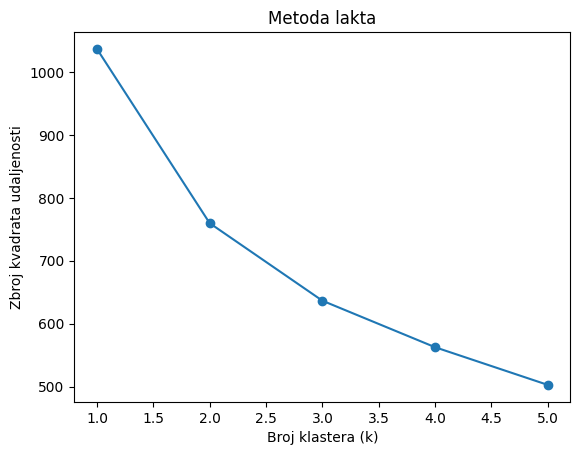

In [13]:
from sklearn.cluster import KMeans

inertia = []
k_values = range(1, 6)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, marker='o')
plt.xlabel("Broj klastera (k)")
plt.ylabel("Zbroj kvadrata udaljenosti")
plt.title("Metoda lakta")
plt.show()

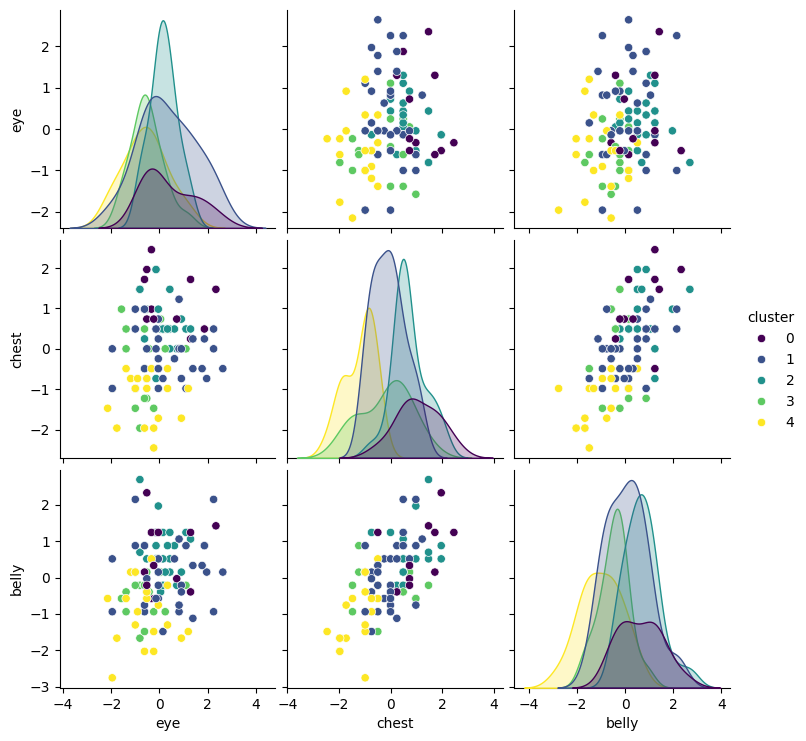

In [14]:
optimal_k = 5

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
scaled_df['cluster'] = kmeans.fit_predict(scaled_df)

features = ["eye", "chest", "belly"]

sns.pairplot(scaled_df, vars=features, hue="cluster", palette="viridis", diag_kind="kde")
plt.show()

**Odgovor:** Kao što je vidljivo iz slike grupe se ne uočavaju. Pri primjeni algoritma k-srednjih vrijednosti treba uzeti u obzir da obično završava u lokalnom optimumu, te je potrebno je odrediti broj k (broj grupa) unaprijed. Također se ne ponaša dobro na podacima sa šumom i stršećim vrijednostima.

d) (2 boda) Izračunajte srednju vrijednost, standardnu devicijaciju i interkvartalno raspršenje za sve numeričke značajke u ovom skupu. Vizualizirajte ih na istom grafu koristeći kutijasti graf (engl. *box-plot*).

                  Mean  Standard Deviation  Interquartile Range (IQR)
age      -6.832142e-17            0.995134                   1.184296
hdlngth  -2.698696e-15            1.004843                   1.138879
skullw    1.716576e-15            1.004843                   1.008578
totlngth -1.368563e-15            1.004843                   1.398675
taill    -1.084602e-15            1.004843                   1.089702
footlgth -5.294910e-16            1.000000                   1.794730
earconch -4.334140e-16            1.004843                   1.760574
eye       1.195625e-16            1.004843                   1.267564
chest     0.000000e+00            1.004843                   1.228056
belly     6.191628e-16            1.004843                   1.136927
cluster   1.980769e+00            1.299595                   2.000000


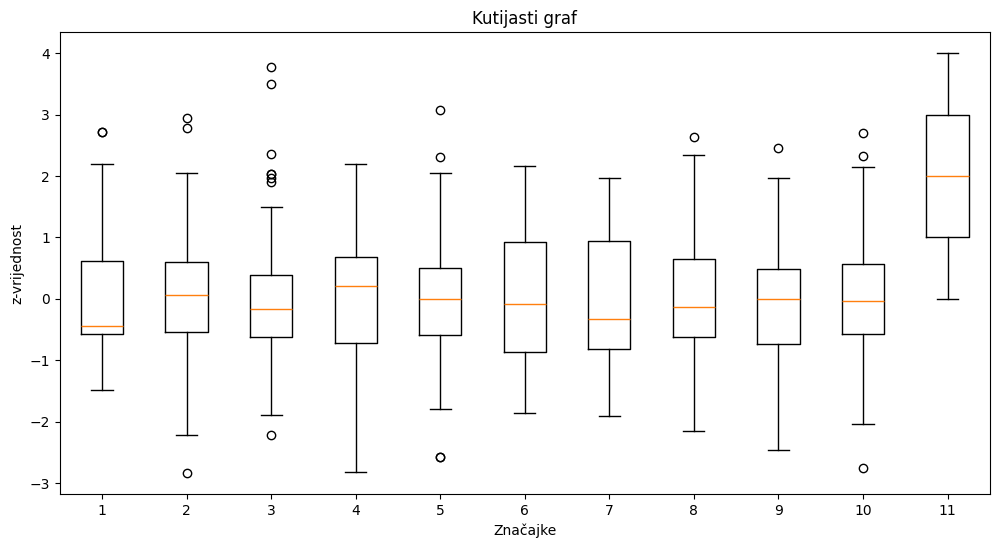

In [15]:
mean_values = scaled_df.mean()
std_values = scaled_df.std()

Q1 = scaled_df.quantile(0.25)
Q3 = scaled_df.quantile(0.75)
iqr_values = Q3 - Q1

stats_df = pd.DataFrame({
    "Mean": mean_values,
    "Standard Deviation": std_values,
    "Interquartile Range (IQR)": iqr_values
})

print(stats_df)

plt.figure(figsize=(12, 6))
plt.boxplot(scaled_df)
plt.title("Kutijasti graf")
plt.xlabel("Značajke")
plt.ylabel("z-vrijednost")
plt.show()

e) (5 bodova) Modelirajte varijablu “totlngth” na temelju ostalih numeričkih
varijabli u skupu koristeći višestruku linearnu regresiju pri čemu je prethodno
potrebno standardizirati prediktorske varijable. Prikažite rezultate modela. Koje
su pretpostavke korištenja linearnog regresijskog modela?

In [16]:
target = "totlngth"
predictors = scaled_df.drop(columns=[target])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(predictors)

X_scaled = pd.DataFrame(X_scaled, columns=predictors.columns)

y = scaled_df[target]

In [17]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_scaled, y)

y_pred = model.predict(X_scaled)
coefficients = pd.DataFrame(model.coef_, index=predictors.columns, columns=["Coefficient"])

print(coefficients)

          Coefficient
age         -0.018064
hdlngth      0.324566
skullw      -0.060569
taill        0.494214
footlgth     0.215280
earconch     0.141826
eye          0.020777
chest        0.141906
belly        0.012595
cluster     -0.098570


**Odgovor:** Pretpostavka linernog regresijskog modela je linearna ovisnost y o ulaznim podatcima. Takva hipoteza u stvarnosti ne mora biti istina.

f) (2 boda) Definirajte srednju kvadratnu pogrešku i primijenite ju na model iz prethodnog pitanja koji se ispituje na izdvojenom testnom skupu – slučajnih 30% primjeraka skupa.

In [18]:
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Srednja kvadratna pogreška na testnom skupu: {mse:.4f}")

Srednja kvadratna pogreška na testnom skupu: 0.3890


## 3. Zadatak

EuroSAT (eurosat.zip) je skup satelitskih RGB slika dimenzija 64x64 koje su raspoređene u deset klasa ovisno o tome što je na njima prikazano (urbana područja, šume, polja, …). Vaš zadatak je složiti model dubokog učenja i naučiti ga na danom skupu podataka. Prikažite implementirani kod.

a) (1 bod) Jedan od prvih koraka u pripremi slika za duboko učenje je njihova
anotacija. Objasnite što je anotirano u danom skupu slika.

**Odgovor:** U danome su skupu anotirani nazivi glavnih kazala koja sadrže slike anotirane istim nazivljem. Anotirane se vrijednosti uzimaju kao referentne vrijednosti prilikom daljnjeg rada.

b) (2 boda) Učitajte dani skup podataka i podijelite ga na skup za učenje i skup za
testiranje. Za samo učitavanje podataka možete iskoristiti već implementirani
razred `torch.utils.data.Dataset`.

In [20]:
import os

from torchvision.io import read_image
from torch.utils.data import Dataset, DataLoader

class EuroSATDataset(Dataset):
    def __init__(self, data_dir):
        self.instances = []

        for label, subdir in enumerate(sorted(data_dir.iterdir())):
            if subdir.is_dir():
                self.instances.extend((str(file), label) for file in subdir.glob("*.jpg"))

    def __len__(self):
        return len(self.instances)

    def __getitem__(self, idx):
        image_path, label = self.instances[idx]
        image = read_image(image_path) / 255.0  # Normalize images
        return image, label

In [22]:
dataset = EuroSATDataset(dataset_dir / "eurosat/2750/")

X_train, X_test = train_test_split(dataset, test_size=0.3, random_state=42)

batch_size = 64

train_dataloader = DataLoader(X_train, batch_size=64, shuffle=True)
test_dataloader = DataLoader(X_test, batch_size=64, shuffle=True)

c) (3 boda) Složite model (bilo kakav) kojim ćete izvršiti klasifikaciju danih slika.

In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)  # More filters
        self.bn1 = nn.BatchNorm2d(32)  # Batch Norm
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.pool = nn.MaxPool2d(2, 2)

        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(128)

        self.fc1 = nn.Linear(128 * 8 * 8, 256)  # Adjusted for input size
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

        self.dropout = nn.Dropout(0.5)  # Dropout for regularization

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))

        x = F.relu(self.bn3(self.conv3(x)))
        x = self.pool(F.relu(self.bn4(self.conv4(x))))

        x = torch.flatten(x, 1)  # Flatten before FC layers
        x = F.relu(self.fc1(x))
        x = self.dropout(x)  # Apply dropout
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [25]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Koristimo {device} za učenje modela.")

model = CNN()
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)
epochs = 5

Koristimo cpu za učenje modela.


Model ocekiva ulaz dimenzija Batch x Channel x Height x Width.

In [29]:
for epoch in range(epochs):

    running_loss = 0.0
    for i, (img, lab) in enumerate(train_dataloader):

        inputs = img.to(device)
        labels = lab.to(device)
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if i % 15 == 14:
            print(f'Epoha: {epoch + 1}, gubitak na skupu za treniranje: {running_loss / 15:.4f}')
            running_loss = 0.0

Epoha: 1, gubitak na skupu za treniranje: 0.8147
Epoha: 1, gubitak na skupu za treniranje: 0.8294
Epoha: 1, gubitak na skupu za treniranje: 0.8166
Epoha: 1, gubitak na skupu za treniranje: 0.6860
Epoha: 1, gubitak na skupu za treniranje: 0.7915
Epoha: 1, gubitak na skupu za treniranje: 0.8222
Epoha: 1, gubitak na skupu za treniranje: 0.8219
Epoha: 2, gubitak na skupu za treniranje: 0.8317
Epoha: 2, gubitak na skupu za treniranje: 0.8293
Epoha: 2, gubitak na skupu za treniranje: 0.7733
Epoha: 2, gubitak na skupu za treniranje: 0.7261
Epoha: 2, gubitak na skupu za treniranje: 0.7882
Epoha: 2, gubitak na skupu za treniranje: 0.7378
Epoha: 2, gubitak na skupu za treniranje: 0.7910
Epoha: 3, gubitak na skupu za treniranje: 0.7167
Epoha: 3, gubitak na skupu za treniranje: 0.7892
Epoha: 3, gubitak na skupu za treniranje: 0.7261
Epoha: 3, gubitak na skupu za treniranje: 0.6486
Epoha: 3, gubitak na skupu za treniranje: 0.7058
Epoha: 3, gubitak na skupu za treniranje: 0.6667
Epoha: 3, gubitak na

d) (3 boda) Prikažite matricu zabune. Izračunajte točnost, preciznost, odziv (recall) i
F1-mjeru (engl. F1-score). Objasnite dobivene rezultate i uspješnost modela
kojeg ste upotrijebili.

In [30]:
y_true = []
y_pred = []

with torch.no_grad():
    for img, lab in test_dataloader:
        images, labels = img.to(device), lab.to(device)
        outputs = model(images)
        # The class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs, 1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

print(classification_report(y_true, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.827     0.814     0.821       318
           1      0.855     0.825     0.840       308
           2      0.732     0.635     0.680       288
           3      0.604     0.508     0.552       303
           4      0.888     0.919     0.903       320
           5      0.676     0.807     0.736       290
           6      0.635     0.675     0.654       292
           7      0.955     0.877     0.914       292
           8      0.664     0.694     0.679       324
           9      0.811     0.891     0.849       265

    accuracy                          0.764      3000
   macro avg      0.765     0.764     0.763      3000
weighted avg      0.765     0.764     0.763      3000



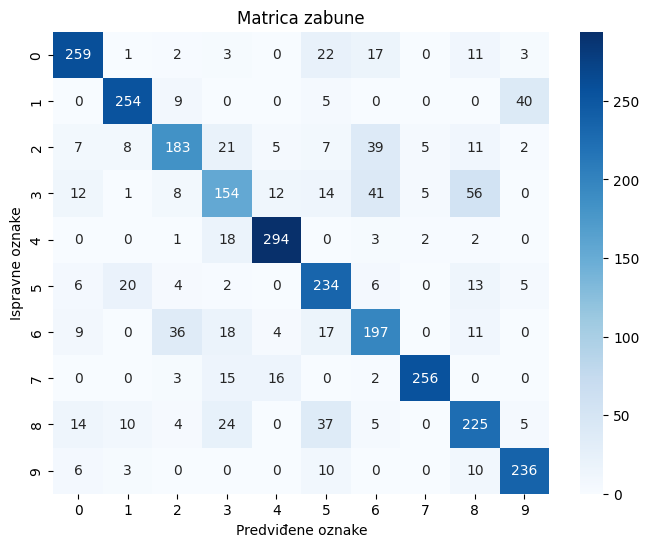

In [32]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predviđene oznake")
plt.ylabel("Ispravne oznake")
plt.title("Matrica zabune")
plt.show()

**Odgovor:** Iz priloženog ispisa i grafičkog prikaza konfuzijske matrice vidimo dobru točnost modela jednostavne konvolucijske mreže. Mjere odziva i preciznosti govore govore da model ima dobre sposobnosti klasifikacije za najmanje 5 klasa. Konačno pogledamo li F1 mjeru vidimo da smo ostvarili dobar model za nešto više od 30 linija Python koda.

In [37]:
from sklearn.metrics import f1_score

print(f1_score(y_true, y_pred, average="weighted"))

0.7627421735951645


e) (5 bodova) Napišite funkciju za učenje modela i naučite implementirani model
(dovoljno je da model naučite na samo jednoj epohi => num_epochs=1). Ispišite
iznos funkcije gubitka i točnost vašeg modela na testnom skupu podataka.

**Odgovor:** U prethodnome smo dijelu zadatka već proveli treniranje radi preglednosti pisanja programskog koda. Krajnja točnost dolazi do ~76% i gubitak do 0.71.

# Dodatna teorijska pitanja

## 4. Zadatak

Marko je pri učenju primjetio da mu se model dosta lagano prenauči i stoga je
odlučio uvesti određene metode regularizacije. Točnije, odlučio je koristiti dropout i to
na takav način da bi poredao više dropout slojeva jedan za drugim:

In [ ]:
def Model(nn.Module):
    def __init__(self, . . .):
        # ... other code ...
        self.dropout1 = nn.Dropout(p=0.1)
        self.dropout2 = nn.Dropout(p=0.15)
        self.dropout3 = nn.Dropout(p=0.2)
        # ... other code
    def forward(self, x):
        # ... other code ...
        x = self.dropout1(x)
        x = self.dropout2(x)
        x = self.dropout3(x)
        # ... other code ...

Ima li ovakvo redanje dropout slojeva smisla? Je li moguće postići isti regularizacijski učinak s manje linija koda? Obrazložite svoj odgovor i modificirajte Markov kod!

**Odgovor:** Ovakvo redanje nema smisla, jer je isti regularizacijski učinak moguće postići jednim Dropout slojem kako je prikazano u nastavku.

(1 - 0.1)x(1 - 0.15)x(1 - 0.2) = 0.612

In [ ]:
def Model(nn.Module):
    def __init__(self, . . .):
        # ... other code ...
        self.dropout = nn.Dropout(p=0.388)
        # ... other code
    def forward(self, x):
        # ... other code ...
        x = self.dropout(x)
        # ... other code ...

## 5. Zadatak

Osim primjene metode očuvanja mjere sredine, koje ste još postupke mogli primijeniti za zamjenu nedostajuće vrijednosti nekom drugom u 1. zadatku?

**Odgovor:** Osim metode očuvanja mjere sredine, mogli bismo primijeniti metodu izbacivanja nedostajućih vrijednosti u slučajevima kada takvih nema pretjerano mnogo, možemo ih grupirati po sličnim vrijednostima ili koristiti metode matematičke interpolacije.

## 6. Zadatak

Objasnite princip učenja značajki (engl. feature learning, representation learning) u kontekstu ekspertnih značajki i ulaznih podataka.

**Odgovor:** Učenje značajki odnosi se na proces automatskog izvlačenja relevantnih značajki iz ulaznih podataka, umjesto ručnog dizajniranja (tzv. ekspertnih značajki). Npr., u kontekstu računalnog vida, tradicionalni pristupi koristili su ručno dizajnirane filtre, dok konvolucijske neuronske mreže automatski uče značajke poput rubova, oblika i tekstura na višim razinama apstrakcije.

## 7. Zadatak

Objasnite koja je razlika između reziduala i pogreške kod regresije. 

**Odgovor:** Pogreška označava odstupanje stvarne izlazne vrijednosti od prave funkcije koja opisuje odnos između varijabli, dok je rezidual razlika između stvarne vrijednosti iz skupa podataka i predviđene vrijednosti regresijskog modela. Dakle, mjeri koliko je podatak odstupio od stvarnog fenomena, dok rezidual mjeri koliko je model dobro prilagodio podatke.

## 8. Zadatak

 Što testiramo hi-kvadrat testom, kakve frekvencije koristimo u izračunu hikvadrat vrijednosti?

**Odgovor:** Hi-kvadrat test se koristi za testiranje statističke neovisnosti između dvije kategorizirane varijable. Također se može koristiti za provjeru usklađenosti distribucije s očekivanom raspodjelom. Ako je vrijednost testa veća od kritične vrijednosti, odbacujemo hipotezu o nezavisnosti.

## 9. Zadatak

Za algoritam k-NN, navedite kako izabrati k u praksi.

**Odgovor:** Za algoritme k-NN promatramo grešku modela u odnosu na varijablu k i biramo točku gdje se greška prestaje značajno smanjivati. Takva se metoda naziva *metodom lakta*. Metoda *unakrsne validacije* testira više vrijednosti k i biramo onu s najmanjom pogreškom. Jos je bitna *metoda silueta* spomenuta na predmetu Strojno učenje 1.

## 10. Zadatak

Navedite koja svojstva funkcija mora zadovoljavati da bude mjera udaljenosti.

**Odgovor:** Da bude mjera udaljenosti, funkcaija mora zadovoljiti uvjete: **ne-negativnost** (udaljenost nikada nije negativna), **simetrija** (udaljenost ne ovisi o redoslijedu točaka), **identitet** (udaljenost između istih točaka je nula) te **nejednakost trokuta** (najkraći put između dvije točke nikada ne može biti duži od prolaska kroz treću točku).

## 11. Zadatak

Navedite barem dva slučaja kada biste primijenili umjetno povećavanje broja
primjera u skupu podataka.

**Odgovor:** Umjetno se povećavanje podataka koristi kada imamo nedovoljno podataka ili neuravnoteženost među klasama. Kada imamo malo slika, koristimo rotacije, skaliranja, zrcaljenja, šum kako bismo povećali broj primjera. S druge strane, ako jedna klasa ima mnogo manje primjera od druge (npr. bolest vs. zdravlje u medicinskim podacima), mozemo koristiti SMOTE (Synthetic Minority Over-sampling Technique) za generiranje novih sintetičkih primjera.